In [1]:
import pandas as pd
import math
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('indicator.csv')
df

,num_posts,num_c_with,num_c,indicator,date_num,date
0,5,4,16,0.800000,18871,2021-09-01
1,5,5,40,1.000000,18872,2021-09-02
2,1,0,3,0.000000,18873,2021-09-03
3,0,0,1,NaN,18874,2021-09-04
4,1,0,1,0.000000,18875,2021-09-05
...,...,...,...,...,...,...
513,7,11,154,1.571429,19384,2023-01-27
514,2,11,80,5.500000,19385,2023-01-28
515,4,0,16,0.000000,19386,2023-01-29
516,3,9,43,3.000000,19387,2023-01-30


In [3]:
df_month=pd.DataFrame()
df_month['date']=['2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01']
df_month['sum_i']=0
df_month['n']=0
df_month=df_month.set_index('date')
df_month['date']=df_month.index
df_month

,sum_i,n,date
date,,,
2021-09,0,0,2021-09
2021-10,0,0,2021-10
2021-11,0,0,2021-11
2021-12,0,0,2021-12
2022-01,0,0,2022-01
2022-02,0,0,2022-02
2022-03,0,0,2022-03
2022-04,0,0,2022-04
2022-05,0,0,2022-05


In [4]:
i=0
for i in range (len(df)):
    if math.isnan(df['indicator'][i])==False and math.isinf(df['indicator'][i])==False:
        df_month.loc[df['date'][i][:7],'sum_i']=df_month['sum_i'][df['date'][i][:7]]+df['indicator'][i]
        df_month.loc[df['date'][i][:7],'n']=df_month['n'][df['date'][i][:7]]+1

In [5]:
df_month

,sum_i,n,date
date,,,
2021-09,5.952381,25,2021-09
2021-10,6.827525,28,2021-10
2021-11,12.854526,29,2021-11
2021-12,12.757143,30,2021-12
2022-01,7.438889,25,2022-01
2022-02,5.816667,23,2022-02
2022-03,12.853247,23,2022-03
2022-04,6.555250,28,2022-04
2022-05,11.873413,28,2022-05


In [6]:
df_month['indicator']=df_month['sum_i']/df_month['n']
df_month

,sum_i,n,date,indicator
date,,,,
2021-09,5.952381,25,2021-09,0.238095
2021-10,6.827525,28,2021-10,0.243840
2021-11,12.854526,29,2021-11,0.443260
2021-12,12.757143,30,2021-12,0.425238
2022-01,7.438889,25,2022-01,0.297556
2022-02,5.816667,23,2022-02,0.252899
2022-03,12.853247,23,2022-03,0.558837
2022-04,6.555250,28,2022-04,0.234116
2022-05,11.873413,28,2022-05,0.424050


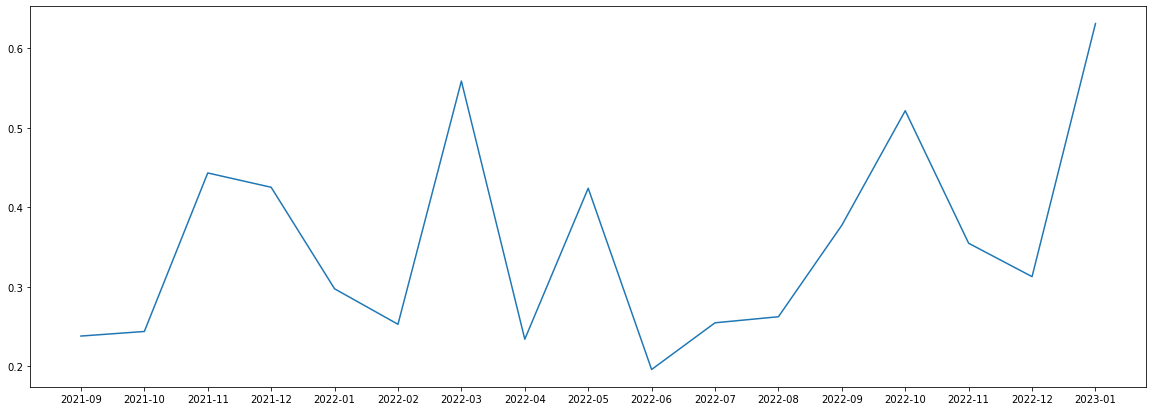

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['indicator'])

In [8]:
df_month['stat_IE']=[12.3, 13.6, 13.5, 14.8, 13.7, 13.5, 18.3, 12.5, 11.5, 12.4, 10.8, 12.0, 12.5, 12.8, 12.2, 12.1, 'nan']

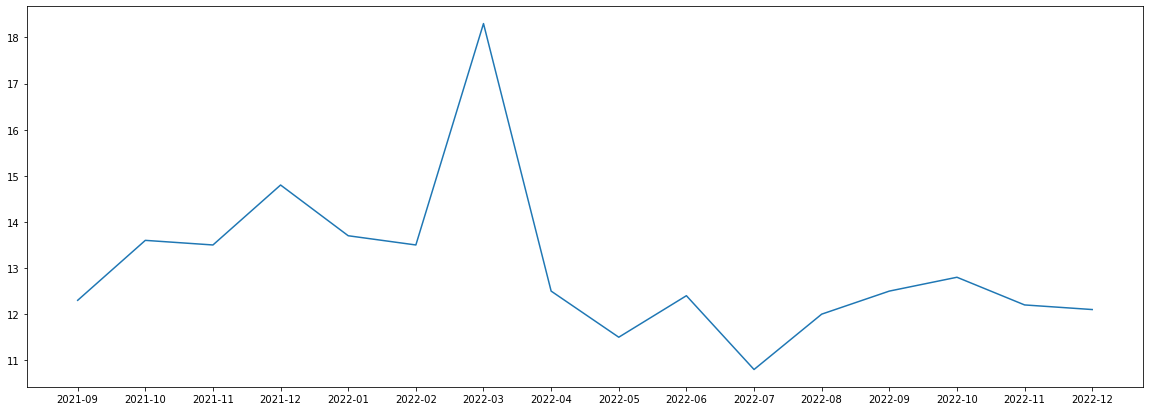

In [9]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['stat_IE'])

In [10]:
import numpy as np

In [11]:
np.corrcoef(df_month['stat_IE'][:-1].astype(float), df_month['indicator'][:-1].astype(float))

array([[1.        , 0.54713321],
       [0.54713321, 1.        ]])

In [12]:
import scipy.stats

In [13]:
scipy.stats.pearsonr(df_month['stat_IE'][:-1].astype(float), df_month['indicator'][:-1].astype(float))

(0.5471332097856353, 0.028275271267054966)

In [14]:
scipy.stats.spearmanr(df_month['stat_IE'][:-1].astype(float), df_month['indicator'][:-1].astype(float))

SpearmanrResult(correlation=0.2945511294562622, pvalue=0.2681084813091418)